In [11]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

元のモンテカルロ法計算式

In [12]:
N_in = 0
N_out = 0
N = 1000 #試行回数
ran_x = random.rand(N) #Xの乱数
ran_y = random.rand(N) #Yの乱数
ran_point = np.hypot(ran_x,ran_y) #X^2 + Y^2の平方根   

for i in ran_point:
    if i <= 1:
        N_in += 1
    else:
        N_out += 1

Pie = N_in/N*4 #パイの近似式

print("IN: {} ".format(N_in))
print("OUT: {} ".format(N_out))
print("ALL: {} ".format(N))
print("ALL?: {} ".format(N_in/N*4))

print("Pi: {} ".format(Pie))

IN: 782 
OUT: 218 
ALL: 1000 
ALL?: 3.128 
Pi: 3.128 


関数化,

計算結果優先

In [13]:

def monte(n):
    N_in = 0
    N_out = 0
    N = n+1
    ran_x = random.rand(N) #Xの乱数
    ran_y = random.rand(N) #Yの乱数
    ran_point = np.hypot(ran_x,ran_y) #X^2 + Y^2の平方根

    for i in ran_point:
        if i <= 1:
            N_in += 1
        else:
            N_out += 1

    Pie = N_in/N*4 #パイの近似式
    return Pie


グラフ出力(monte2で使う)

In [14]:
def plot_graph(x,y,n,N):
    c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color = "black")
    ax = plt.gca()
    ax.add_patch(c1)
    plt.axis("scaled")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("PLOT")

    plt.scatter(x, y, marker=".", color = "green", label = "POINT")
    plt.savefig('out_graph'+str(n)+'_'+str(N)+'.png', dpi=300, orientation='portrait', transparent=False, pad_inches=0.0)


関数化その2、

グラフ結果を見るために

In [15]:
def monte2(n):
    N_in = 0
    N_out = 0
    N = n+1
    ran_x = random.rand(N) #Xの乱数
    ran_y = random.rand(N) #Yの乱数
    ran_point = np.hypot(ran_x,ran_y) #X^2 + Y^2の平方根

    for i in ran_point:
        if i <= 1:
            N_in += 1
        else:
            N_out += 1

    Pie = N_in/N*4 #パイの近似式
    return [Pie, ran_x ,ran_y]

Let's 並列

In [16]:
from joblib import Parallel, delayed
from datetime import datetime

まずは、並列なしで時間を見る

In [7]:
start_time = datetime.now()
total = []
for i in range(10000):
    total.append(monte(i))
print(total[-1])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

3.0956
Duration: 0:00:13.709060


並列を行う部分を関数化

Para(n)

n:タスク分割数

In [17]:
def Para(n):
    start_time = datetime.now()
    r = Parallel(n_jobs=n)( [delayed(monte)(i) for i in range(10000)] )
    print(r[-1])
    end_time = datetime.now()
    return print('Duration: {}'.format(end_time - start_time))

In [44]:
Para(1)

3.1492
Duration: 0:00:13.907976


In [29]:
Para(2)

3.1544
Duration: 0:00:07.716583


In [30]:
Para(3)

3.1648
Duration: 0:00:07.580966


In [31]:
Para(4)

3.1076
Duration: 0:00:07.552587


In [18]:
Para(5)

3.1656
Duration: 0:00:07.967949


In [20]:
Para(6)

3.1408
Duration: 0:00:08.648991


In [32]:
Para(8)

3.146
Duration: 0:00:08.424706


In [33]:
Para(16)

3.146
Duration: 0:00:08.446219


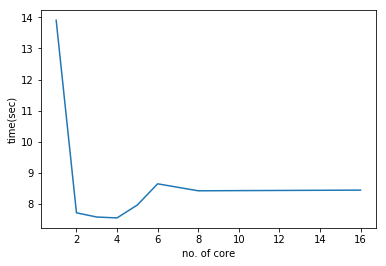

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
x = (1,2,3,4,5,6,8,16)
y = (13.907976, 7.716583, 7.580966, 7.552587, 7.967949, 8.648991, 8.424706, 8.446219)
plt.plot(x, y)
plt.xlabel('no. of core')
plt.ylabel('time(sec)')
plt.show()

並列を行う部分を関数化その2

Para(n,N)

n:タスク分割数

N:試行回数

In [19]:
def Para2(n,N):
    start_time = datetime.now()
    r = Parallel(n_jobs=n)( [delayed(monte2)(i) for i in range(N)] )
    print(r[-1][0])
    end_time = datetime.now()
    plot_graph(r[-1][1],r[-1][2],n,N)
    return print('Duration: {}'.format(end_time - start_time))

並列化なしももちろん実行

3.1464
Duration: 0:00:14.244897


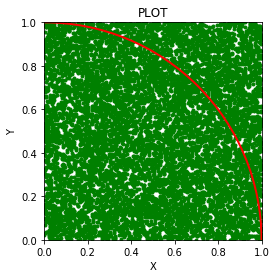

In [73]:
start_time = datetime.now()
total2 = []
for i in range(10000):
    total2.append(monte2(i))
print(total2[-1][0])
end_time = datetime.now()
plot_graph(total2[-1][1],total2[-1][2],0,10000)
print('Duration: {}'.format(end_time - start_time))

3.156
Duration: 0:00:14.584366


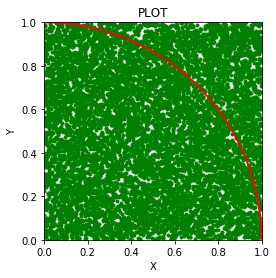

In [64]:
Para2(1,10000)

3.1452
Duration: 0:00:13.118417


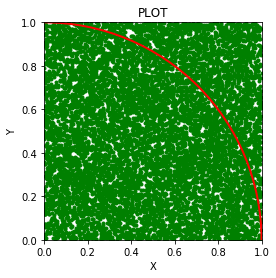

In [65]:
Para2(2,10000)

3.1392
Duration: 0:00:11.295175


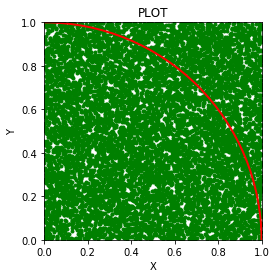

In [22]:
Para2(6,10000)

3.252
Duration: 0:00:00.481123


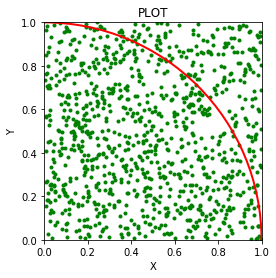

In [67]:
Para2(1,1000)

3.244
Duration: 0:00:00.782115


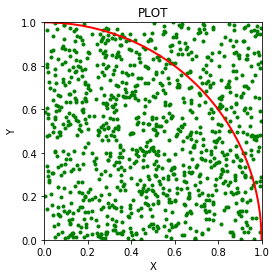

In [68]:
Para2(2,1000)

3.112
Duration: 0:00:00.549006


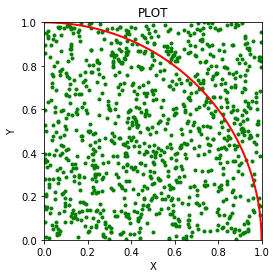

In [69]:
Para2(3,1000)

3.1448
Duration: 0:00:10.773472


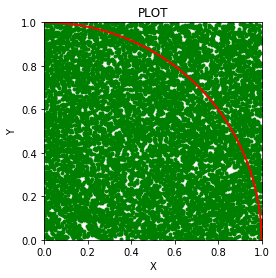

In [75]:
Para2(4,10000)

3.1564
Duration: 0:00:09.960942


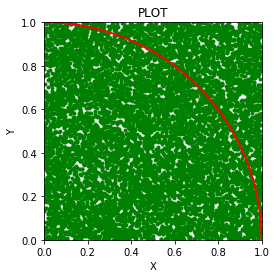

In [76]:
Para2(5,10000)

3.1348
Duration: 0:00:10.669959


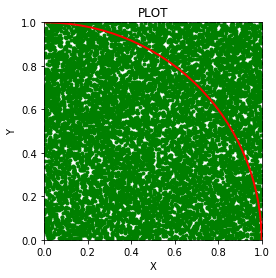

In [77]:
Para2(6,10000)

3.104
Duration: 0:00:10.144553


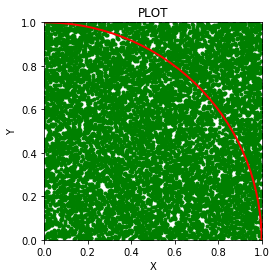

In [78]:
Para2(8,10000)

3.1676
Duration: 0:00:11.545583


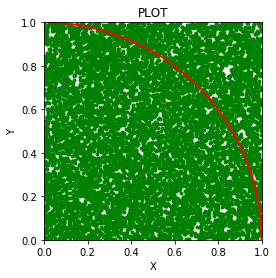

In [79]:
Para2(16,10000)

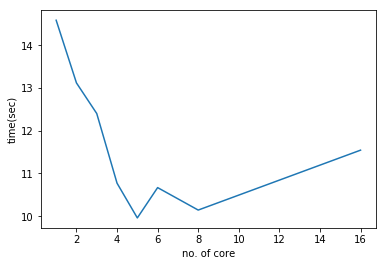

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
x = (1,2,3,4,5,6,8,16)
y = (14.584366, 13.118417, 12.402267, 10.773472, 9.960942, 10.669959,10.144553, 11.545583)
plt.plot(x, y)
plt.xlabel('no. of core')
plt.ylabel('time(sec)')
plt.show()